## ML_EnsembleNet

In [4]:
# For working with numbers and data
import numpy as np
import pandas as pd
import joblib

# For making graphs and charts
import seaborn as sns
import matplotlib.pyplot as plt

# For converting text labels to numbers and scaling data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# For splitting the data into training and testing
from sklearn.model_selection import train_test_split

# Machine learning models
from sklearn.ensemble import RandomForestClassifier     # Random Forest
from sklearn.svm import SVC                             # Support Vector Machine
from sklearn.naive_bayes import GaussianNB              # Naive Bayes
from sklearn.ensemble import StackingClassifier         # Combining models

# For checking model accuracy and performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# For deep learning (neural networks)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping    # To stop training early if needed

# To ignore warning messages
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np  # Importing NumPy for loading .npz files

# Load the previously saved train-test split from the .npz file
data = np.load('Dataset/train_test_split.npz')

# Extract the training features
X_train = data['X_train']

# Extract the testing features
X_test = data['X_test']

# Extract the training labels
y_train = data['y_train']

# Extract the testing labels
y_test = data['y_test']


In [6]:
rf_model = joblib.load("Model/rfc_model.pkl")
xgb_model = joblib.load("Model/xgb_model.pkl")
gbc_model = joblib.load("Model/gbc_model.pkl")

ml_ensemble_probs = (rf_model.predict_proba(X_test) +
                 xgb_model.predict_proba(X_test) +
                 gbc_model.predict_proba(X_test)) / 3
ensemble_preds = np.argmax(ml_ensemble_probs, axis=1)

In [7]:
# 📈 Accuracy
mle_accuracy = accuracy_score(y_test, ensemble_preds)
print("✅ ML Ensemble Accuracy:", mle_accuracy)

# 📄 Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, ensemble_preds))

✅ ML Ensemble Accuracy: 0.9847033142819056

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     12784
           1       0.98      0.98      0.98     19820
           2       0.97      0.99      0.98     12092
           3       1.00      1.00      1.00     15317

    accuracy                           0.98     60013
   macro avg       0.98      0.98      0.98     60013
weighted avg       0.98      0.98      0.98     60013



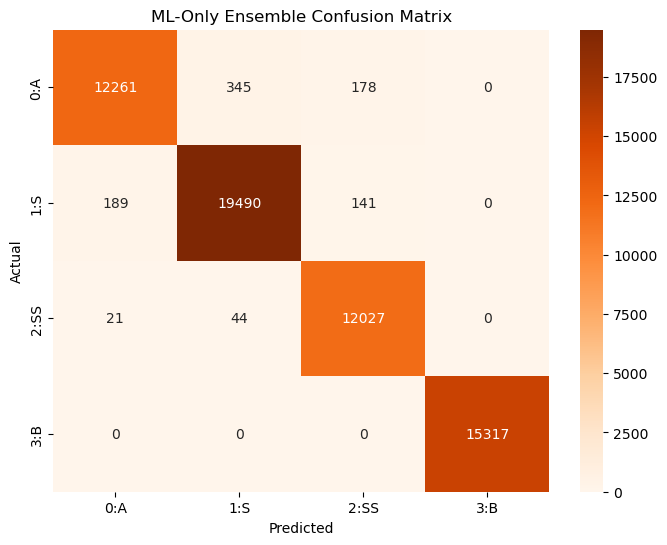

In [8]:
# 📊 Confusion Matrix
cm = confusion_matrix(y_test, ensemble_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='d',
            xticklabels=["0:A", "1:S", "2:SS", "3:B"],
            yticklabels=["0:A", "1:S", "2:SS", "3:B"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("ML-Only Ensemble Confusion Matrix")
plt.show()

In [9]:
# 🚨 False Positives
fp_class = cm.sum(axis=0) - np.diag(cm)
mle_tfp = fp_class.sum()

print("\n🚨 False Positives Per Class:")
for i, fp in enumerate(fp_class):
    label = ['A', 'S', 'SS', 'B'][i]
    print(f"  ➤ Class {i} (Label: {label}): {fp}")
print("\n❗ Total False Positives:", mle_tfp)


🚨 False Positives Per Class:
  ➤ Class 0 (Label: A): 210
  ➤ Class 1 (Label: S): 389
  ➤ Class 2 (Label: SS): 319
  ➤ Class 3 (Label: B): 0

❗ Total False Positives: 918
